![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# 1. Nhập dữ liệu từ file chứa các email (file csv)

In [1]:
# import stuffs
import numpy as np
import pandas as pd
import string
import nltk
# nltk.download('stopwords') # if not downloaded 'stopwords' module yet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
ENGLISH_STOP_WORDS = set(stopwords.words('english'))

In [9]:
# load data
df = pd.read_csv(r"C:\Users\admin\OneDrive - VNU-HCMUS\jupyter notebook\emails.csv")
df.head(7)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1


In [10]:
# print the shape
df.shape

(5728, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# 2. Xử lí làm sạch bộ dữ liệu (data cleaning)

In [12]:
# Check for duplicates and remove them
df.drop_duplicates(inplace = True)
print(df.shape) # new shape

(5695, 2)


In [13]:
# show a missing (NAN, NaN, na) data for each column
df.isnull().sum()

text    0
spam    0
dtype: int64

In [14]:
# Example of stopwords in English
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
# Example of punctuation
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [16]:
# process_text: processing the text and return a keyword from a text, includeing: removing stopwords, removing punctuation
def process_text(text):
    # remove the punctuation
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    # remove stopwords
    clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    # return a list of clean text words
    return clean_words

In [17]:
# Example using process_text function
message4 = 'hello world hello hello world play'
message5 = 'test test test test test one hello'
print(message4)
# convert the text to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer as cv
bow4 = cv(analyzer = process_text).fit_transform([[message4], [message5]])
print(bow4)
print("Shape: ", bow4.shape)

hello world hello hello world play
  (0, 0)	3
  (0, 4)	2
  (0, 2)	1
  (1, 0)	1
  (1, 3)	5
  (1, 1)	1
Shape:  (2, 5)


In [18]:
# show the tokenization (a list of tokens also called lemmas)
df['text'].head(3).apply(process_text)

0    [Subject, naturally, irresistible, corporate, ...
1    [Subject, stock, trading, gunslinger, fanny, m...
2    [Subject, unbelievable, new, homes, made, easy...
Name: text, dtype: object

In [19]:
# the original text
df['text'].head(3)

0    Subject: naturally irresistible your corporate...
1    Subject: the stock trading gunslinger  fanny i...
2    Subject: unbelievable new homes made easy  im ...
Name: text, dtype: object

In [20]:
# We clear the data in dataframe
df['processed_text']=df['text'].apply(process_text)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# 3. Trực quan hoá dữ liệu

## Vẽ biểu đồ wordcloud

**Khái niệm cơ bản về wordcloud :** Đây là một công cụ tiện ích hỗ trợ cho việc ước lượng các từ có tần xuất xuất hiện cao trong bộ dữ liệu đang có dưới dạng hình ảnh. Thông qua wordcloud giúp cho ta phần nào thấy được các từ hay xuất hiện trong email spam gồm những từ nào và tương tự cho các từ thường xuất hiện trong email bình thường . Nhận biết được một cách rõ ràng về vấn đề này cũng là một tiền đề trong việc xây dựng mô hình phân loại email spam.

**Vẽ wordcloud :**
1. Tạo một hàm để vẽ wordcloud từ gói wordcloud đã tải xuống (có thể bổ sung thêm các stopword theo mong muốn)
2. Vẽ wordcloud cho email spam và email bình thường.


In [21]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [30]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown','Subject'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

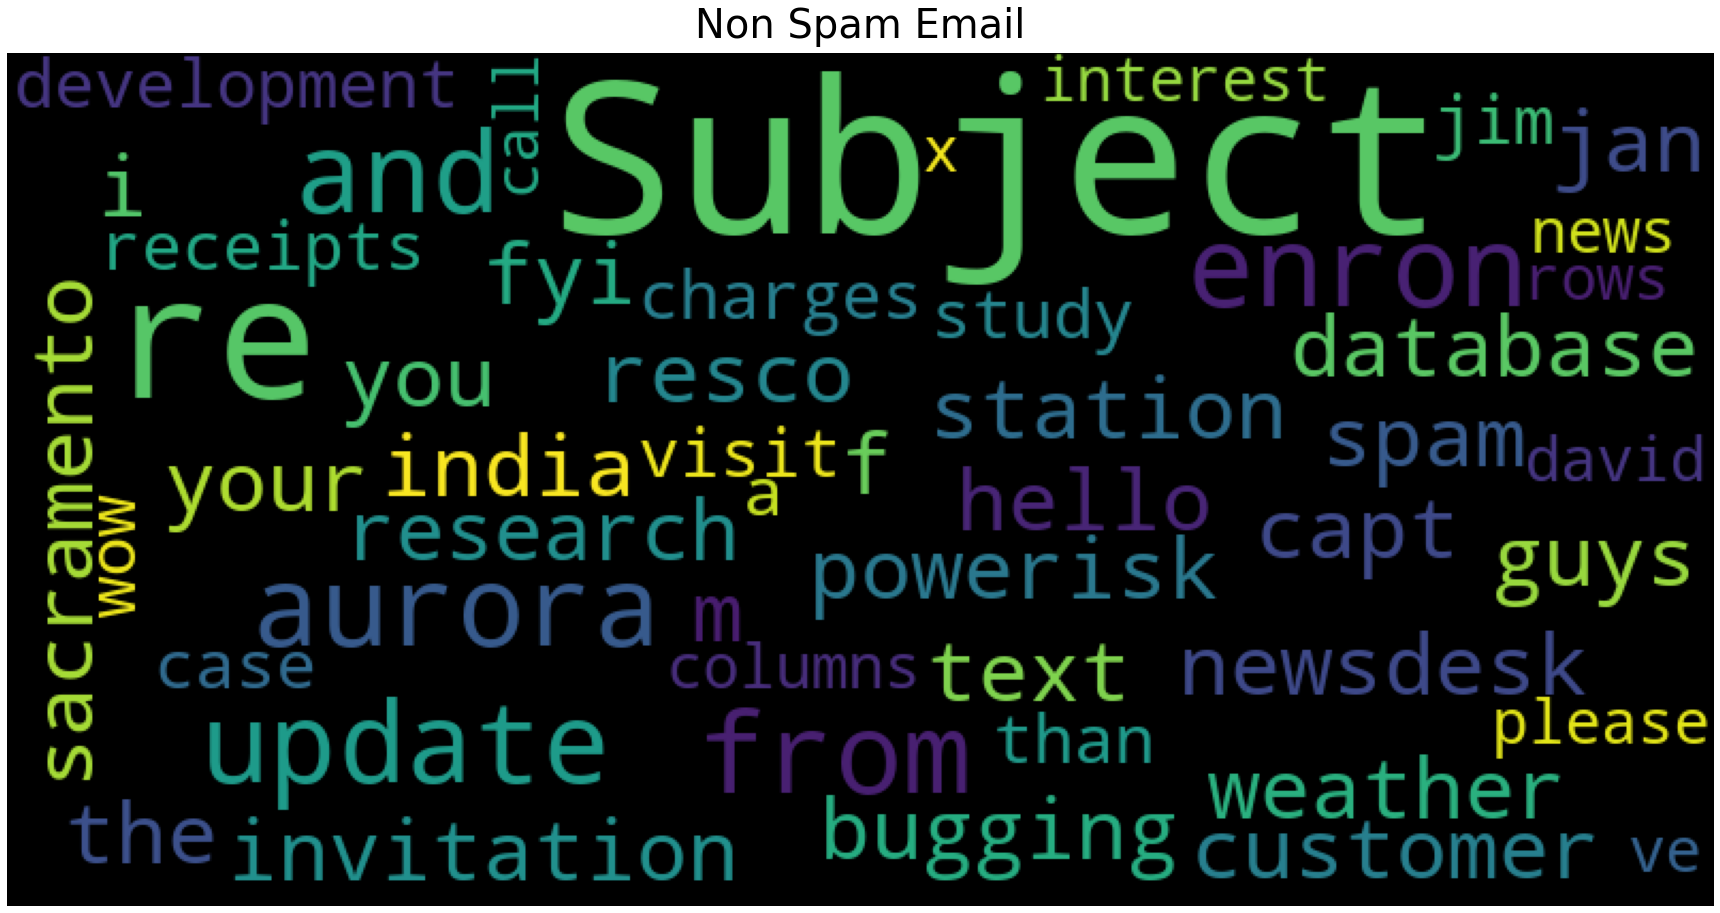

In [25]:
df_textNonSpam = df[df['spam'] == 0]

plot_wordcloud(df_textNonSpam,title = 'Non Spam Email')

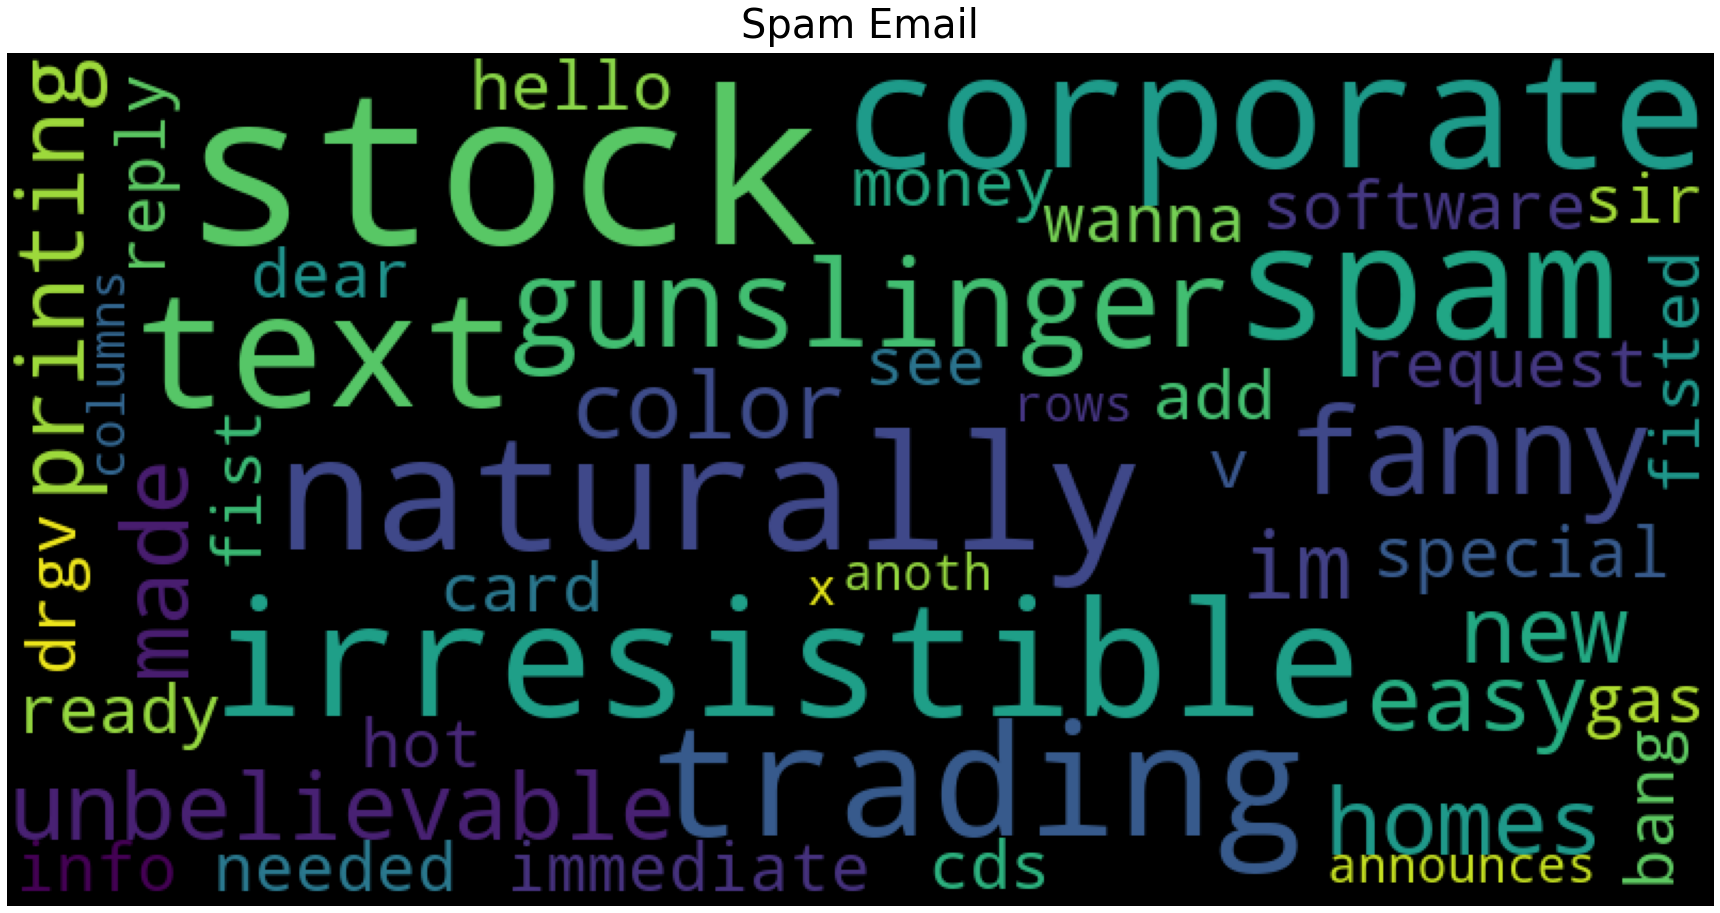

In [31]:
df_textSpam = df[df['spam'] == 1]

plot_wordcloud(df_textSpam,title = 'Spam Email')

In [26]:
sum(df_textNonSpam.text.str.count("subject"))

4238

In [29]:
sum(df_textSpam.text.str.count("subject"))

209

## Vẽ biểu đồ tròn

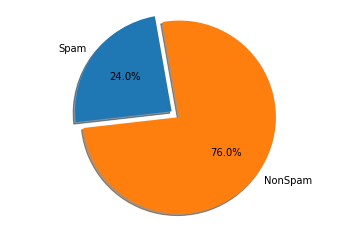

In [25]:
import matplotlib.pyplot as plt
Spam=len(df_textSpam)
NonSpam=len(df_textNonSpam)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels=["Spam","NonSpam"]
data=[Spam,NonSpam]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(data, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=100)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# 4. Chia dữ liệu thành 2 phần training và testing

In [26]:
# Convert a collection of text to a matrix of tokens
from sklearn.feature_extraction.text import CountVectorizer
messages = cv(analyzer = process_text).fit_transform(df['text'])
messages

<5695x37229 sparse matrix of type '<class 'numpy.int64'>'
	with 562930 stored elements in Compressed Sparse Row format>

In [27]:
#split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(messages, df['spam'], test_size=0.20, random_state=0)
# To see the shape of the data
print(xtrain.shape)

(4556, 37229)


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# 5. Áp dụng thuật toán Naive Bayes để xử lí phân loại

In [28]:
# Create and train the Naive Bayes Calssifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(xtrain, ytrain)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
# 6. Đánh giá model 

In [29]:
# Evaluate the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score 
pred = classifier.predict(xtrain)
print(classification_report(ytrain, pred))
print("*"*80)
print("Confusion matric: \n", confusion_matrix(ytrain, pred))
print("*"*80)
print("Accuracy: ", accuracy_score(ytrain, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3457
           1       0.99      1.00      0.99      1099

    accuracy                           1.00      4556
   macro avg       0.99      1.00      1.00      4556
weighted avg       1.00      1.00      1.00      4556

********************************************************************************
Confusion matric: 
 [[3445   12]
 [   1 1098]]
********************************************************************************
Accuracy:  0.9971466198419666


In [77]:
# Print the predictions value
#np.set_printoptions(threshold=sys.maxsize)
#np.set_printoptions(threshold = False)
print(classifier.predict(xtrain))
print(ytrain.values)


[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [78]:
for i in range(64*2):
    print(classifier.predict(xtrain)[i], end = ' ')

0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 

In [79]:
for i in range(64*2):
    print(ytrain.values[i], end = ' ')

0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 

In [80]:
# Evaluate the model on the testing data set
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score 
pred = classifier.predict(xtest)
print(classification_report(ytest, pred))
print("*"*80)
print("Confusion matric: \n", confusion_matrix(ytest, pred))
print("*"*80)
print("Accuracy: ", accuracy_score(ytest, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       870
           1       0.97      1.00      0.98       269

    accuracy                           0.99      1139
   macro avg       0.98      0.99      0.99      1139
weighted avg       0.99      0.99      0.99      1139

********************************************************************************
Confusion matric: 
 [[862   8]
 [  1 268]]
********************************************************************************
Accuracy:  0.9920983318700615


In [81]:
# Print the predictions value
print(classifier.predict(xtest))
print(ytest.values)

[1 0 0 ... 0 0 0]
[1 0 0 ... 0 0 0]
